In [3]:
import pymc3 as pm
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
with pm.Model() as pi_solver:

    #priors 
    r = pm.Uniform('r', -1, 1)
    r2 = pm.Uniform('r2', -1, 1)
    
    #expected value
    pi_est  = pm.Deterministic('pi_est', r * r + r2 * r2)

    #likelihood
    trace = pm.sample(10000)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [r2, r]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 17 seconds.


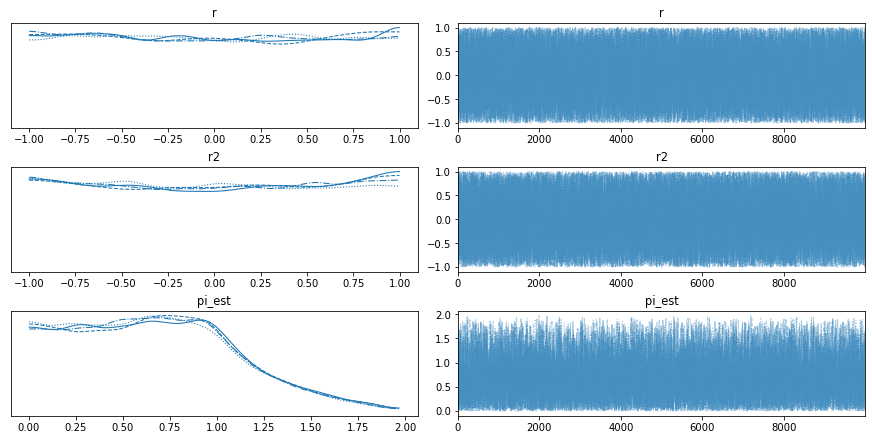

In [9]:
az.plot_trace(trace);

In [13]:
df_pi = pm.trace_to_dataframe(trace)
df_pi_filter = df_pi[df_pi['pi_est'] < 1.0]
4 * len(df_pi_filter) / len(df_pi)

3.0977

In [87]:
%matplotlib inline
plt.Circle((0,0), 1, color='black', fill=False);